In [ ]:
'''
Programming team: Oktawian Filipkowski, Maciej Zakrzewski
Exercise 2:
Neural network should recognize animals.
We will use CIFAR10 dataset which is already sorted into training
and test sets.
CIFAR10 containts other pictures, they wont be dropped will be used.
Later we will only use pictures with animals to check our DL algo

We will, start with necessary imports and downloads
'''
import random
import matplotlib.pyplot as plt
import numpy as np
import itertools
from sklearn.metrics import confusion_matrix
import random
import pandas as pd
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

(train_data, train_labels), (test_data, test_labels) = cifar10.load_data()

In [ ]:
'''
Now we check shapes of our data
'''
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [ ]:
'''
Now we create class names according to CIFAR10 description 
and check how many classes are there
'''
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']

len(class_names)

10

In [19]:
  '''
  First let's pick random animal image
  '''
  p = random.randint(0, len(train_data))
  
  while True:
    if train_labels[p] in range (2,8):
      break
    else:
      p = random.randint(0, len(train_data))

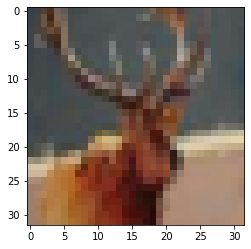

In [20]:
'''
Now lets check animal image from our dataset
'''
plt.imshow(train_data[p]);

In [ ]:
'''
Now we need to do few things:
Define input shape (size of our image)
Define output shape so its identical number to our number of classes
Define multiclass loss function
And check accuracy
'''
tf.random.set_seed(42)

cifar_1 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(32, 32, 3)), 
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") 
])

cifar_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

cifar_1_plot = cifar_1.fit(train_data, train_labels, epochs=10, validation_data=(test_data, test_labels)) 

Epoch 1/10
1563/1563 [==============================] - 11s 7ms/step - loss: 2.3977 - accuracy: 0.0988 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 2/10
1563/1563 [==============================] - 10s 7ms/step - loss: 2.3028 - accuracy: 0.0965 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0984 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0990 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0998 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0996 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0985 - val_loss: 2.3026 - val_accurac

In [ ]:
'''
Our model doesnt work, we need to check why
'''
cifar_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 4)                 12292     
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 10)                50        
                                                                 
Total params: 12,362
Trainable params: 12,362
Non-trainable params: 0
_________________________________________________________________


In [ ]:
'''
Lets divide by 255 to have our results be either 0 or 1
'''
train_data.min(), train_data.max()
train_data = train_data / 255.0
test_data = test_data / 255.0

In [ ]:
'''
Now lets check our results with data normalized on the same model
and increased number of neurons and layers
'''
tf.random.set_seed(42)

cifar_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
  tf.keras.layers.Dense(200, activation="relu"),
  tf.keras.layers.Dense(200, activation="relu"),
  tf.keras.layers.Dense(200, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") 
])


cifar_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

cifar_2_plot = cifar_2.fit(train_data, train_labels, epochs=10, validation_data=(test_data, test_labels))

Epoch 1/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.8624 - accuracy: 0.3258 - val_loss: 1.8116 - val_accuracy: 0.3443
Epoch 2/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.6884 - accuracy: 0.3961 - val_loss: 1.6230 - val_accuracy: 0.4155
Epoch 3/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.6017 - accuracy: 0.4272 - val_loss: 1.6166 - val_accuracy: 0.4350
Epoch 4/10
1563/1563 [==============================] - 15s 10ms/step - loss: 1.5472 - accuracy: 0.4464 - val_loss: 1.5504 - val_accuracy: 0.4491
Epoch 5/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.5095 - accuracy: 0.4604 - val_loss: 1.5271 - val_accuracy: 0.4553
Epoch 6/10
1563/1563 [==============================] - 15s 10ms/step - loss: 1.4735 - accuracy: 0.4720 - val_loss: 1.5130 - val_accuracy: 0.4705
Epoch 7/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.4478 - accuracy: 0.4803 - val_loss: 1.5058 - va

In [ ]:
'''
Accuracy is about 45%, as we can see adding additional layer and neurons
improved accuracy by miles
Let's check our model
'''
cifar_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_3 (Dense)             (None, 200)               614600    
                                                                 
 dense_4 (Dense)             (None, 200)               40200     
                                                                 
 dense_5 (Dense)             (None, 200)               40200     
                                                                 
 dense_6 (Dense)             (None, 10)                2010      
                                                                 
Total params: 697,010
Trainable params: 697,010
Non-trainable params: 0
_________________________________________________________________


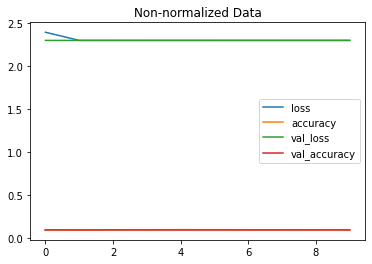

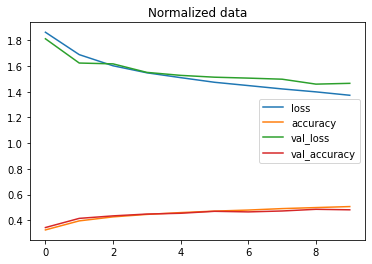

In [ ]:
'''
As we can see, with data normalized and additional layers
our model is working, albeit not perfectly
'''
pd.DataFrame(cifar_1_plot.history).plot(title="Non-normalized Data")
pd.DataFrame(cifar_2_plot.history).plot(title="Normalized data");

In [ ]:
'''
As we can see, normalized data improved much quicker than non-normalized.
We could improve its accuracy by training it longer, but lets leave it at that.
Now let's create confusion matrix to visualize how our model is perfoming

Making prediction with model_2.
'''
y_probs = cifar_2.predict(test_data)
y_preds = y_probs.argmax(axis=1)
confusion_matrix(y_true=test_labels, y_pred=y_preds)

313/313 [==============================] - 2s 6ms/step


array([[523,  51,  80,  37,  22,  23,  30,  43, 108,  83],
       [ 33, 575,  19,  35,   9,  35,  15,  23,  31, 225],
       [ 68,  28, 380,  81, 103,  99, 111,  88,  16,  26],
       [ 39,  18,  98, 286,  42, 233, 135,  69,  22,  58],
       [ 49,  12, 173,  60, 339,  66, 115, 151,  17,  18],
       [ 16,   9,  97, 173,  43, 450,  65,  90,  21,  36],
       [  6,  15,  97,  88, 101,  76, 541,  41,   6,  29],
       [ 43,  29,  56,  54,  42, 100,  28, 589,  11,  48],
       [ 96,  77,  13,  34,  17,  37,  10,  26, 553, 137],
       [ 38, 164,   9,  29,   9,  31,  21,  73,  41, 585]])

In [ ]:
'''
More redeable version
'''
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 

  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] 
  n_classes = cm.shape[0] 

  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), 
         yticks=np.arange(n_classes), 
         xticklabels=labels, 
         yticklabels=labels)
  
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  threshold = (cm.max() + cm.min()) / 2.

  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

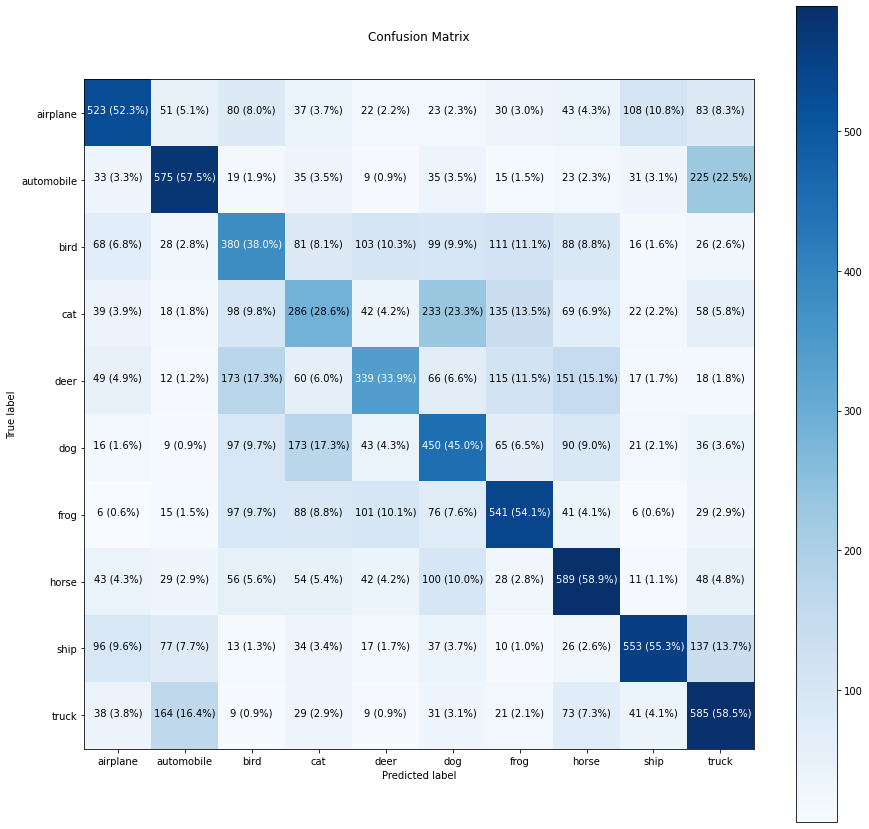

In [ ]:
make_confusion_matrix(y_true=test_labels, 
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

In [ ]:
'''
Lastly we use a function to check how our algo works
'''
def plot_random_image(model, images, true_labels, classes):

  i = random.randint(0, len(images))
  
  while True:
    if test_labels[i] in range (2,8):
      break
    else:
      i = random.randint(0, len(images))

  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(3, 32, 32)) 
  pred_label = pred_probs.argmax()
  true_label = true_labels[i]

 
  plt.imshow(target_image, cmap=plt.cm.binary)

  
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) 
  if pred_label == true_label:
    print("Predicted",class_names[pred_label], "correctly")
  else:
    print("Bad prediction, it wasnt a", class_names[pred_label])

1/1 [==============================] - 0s 64ms/step
Predicted dog correctly


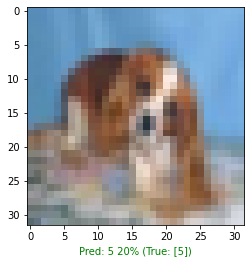

In [ ]:
plot_random_image(model=cifar_2, images=test_data, true_labels=test_labels, classes=class_names)